In [1]:
! pip install -U imbalanced-learn

     -------------------------------------- 199.3/199.3 kB 2.0 MB/s eta 0:00:00


In [4]:
import pandas as pd
df = pd.read_csv('Training_Scores.csv', index_col=False)
df

,Total sentences,Total words,Total Syllable,Gunning Fog Index,Flesch Reading Ease,Flesch-Kincaid Grade,classification
0,1322,5850,NaN,9.76,59.85,6.01,0
1,1239,5499,NaN,8.63,66.35,5.11,0
2,1267,4155,NaN,10.24,54.20,6.51,0
3,1793,6392,NaN,9.47,56.05,6.33,0
4,1395,4555,NaN,9.39,55.94,6.27,0
...,...,...,...,...,...,...,...
62,968,2957,NaN,11.22,49.47,7.12,1
63,1023,3119,NaN,11.18,50.90,6.92,1
64,1853,6477,NaN,12.41,42.52,8.20,1
65,1150,3249,NaN,11.10,49.56,7.05,1


In [9]:
x = df.drop(columns=(["Total sentences", "Total words", "Total words", "Total Syllable"]), axis = 1)

In [10]:
y = df["classification"]

In [11]:
activity_count = y.value_counts()
activity_count

1    51
0    16
Name: classification, dtype: int64

<AxesSubplot:ylabel='classification'>

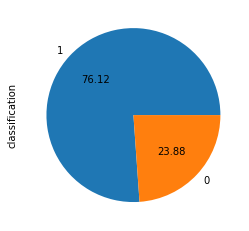

In [12]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

([<matplotlib.patches.Wedge at 0x1d205cd1370>,
 [Text(-0.8046845170000946, 0.7499885519795118, '1'),
  Text(0.8046845521095914, -0.7499885143095102, '0')],
 [Text(-0.438918827454597, 0.4090846647160973, '76.12'),
  Text(0.43891884660523167, -0.4090846441688237, '23.88')])

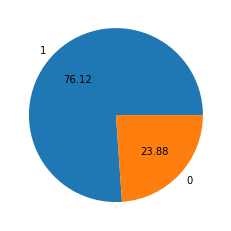

In [13]:
# Show pie plot (Approach 2)
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie(y.value_counts(), autopct='%.2f', labels=activity_count.index)

In [14]:
activity_count.index

Int64Index([1, 0], dtype='int64')

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((53, 4), (53,), (14, 4), (14,))

<AxesSubplot:ylabel='classification'>

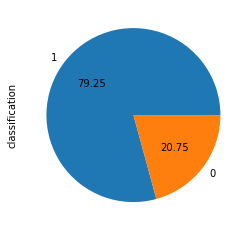

In [18]:
# Pie chart of the training set
y_train.value_counts().plot.pie(autopct='%.2f')

In [19]:
y_train.value_counts()

1    42
0    11
Name: classification, dtype: int64

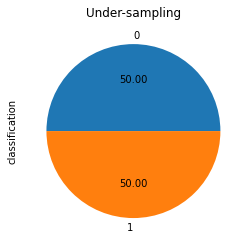

In [20]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

ax = y_train_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [21]:
# Class distribution
y_train_rus.value_counts()

0    11
1    11
Name: classification, dtype: int64

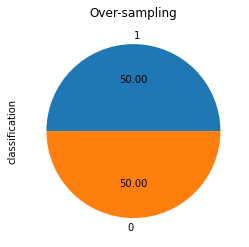

In [22]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

ax = y_train_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [23]:
y_train_ros.value_counts()

1    42
0    42
Name: classification, dtype: int64

In [24]:
# Training Random Forest Models
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42)
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train, y_train, cv=5, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
  
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df1 = pd.concat([df_labels, df_values], axis=1)
df1

,Performance_metric_names,Performance_metric_values
0,MCC_train,1.0
1,MCC_CV,1.0
2,MCC_test,1.0


In [28]:
# Training Random Forest Models
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_rus, y_train_rus)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42)
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train_rus, y_train_rus, cv=5, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(X_train_rus)
y_test_pred = model.predict(X_test)
  
mcc_train = matthews_corrcoef(y_train_rus, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df2 = pd.concat([df_labels, df_values], axis=1)
df2

,Performance_metric_names,Performance_metric_values
0,MCC_train,1.0
1,MCC_CV,1.0
2,MCC_test,1.0


In [29]:
# Training Random Forest Models
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_ros, y_train_ros)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42)
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train_ros, y_train_ros, cv=5, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(X_train_ros)
y_test_pred = model.predict(X_test)
  
mcc_train = matthews_corrcoef(y_train_ros, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df3 = pd.concat([df_labels, df_values], axis=1)
df3

,Performance_metric_names,Performance_metric_values
0,MCC_train,1.0
1,MCC_CV,1.0
2,MCC_test,1.0


In [30]:
# Training Random Forest Models
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, class_weight='balanced') # Class weight balancing
model.fit(X_train, y_train)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42, class_weight='balanced') # Class weight balancing
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train, y_train, cv=5, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
  
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df4 = pd.concat([df_labels, df_values], axis=1)
df4

,Performance_metric_names,Performance_metric_values
0,MCC_train,1.00000
1,MCC_CV,0.95396
2,MCC_test,1.00000


In [31]:
df = pd.concat([df1.Performance_metric_values,
                df2.Performance_metric_values,
                df3.Performance_metric_values,
                df4.Performance_metric_values], axis=1)
df.columns = ['No class balancing', 'Class balancing (undersampling)', 'Class balancing (oversampling)', 'Class balancing (class weights)']
df = df.T
df.columns = ['Training', 'CV', 'Test']
df


,Training,CV,Test
No class balancing,1.0,1.00000,1.0
Class balancing (undersampling),1.0,1.00000,1.0
Class balancing (oversampling),1.0,1.00000,1.0
Class balancing (class weights),1.0,0.95396,1.0


In [32]:
df.to_latex('summary_table.txt')

C:\Users\suhas\AppData\Local\Temp\ipykernel_10852\1128488035.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex('summary_table.txt')


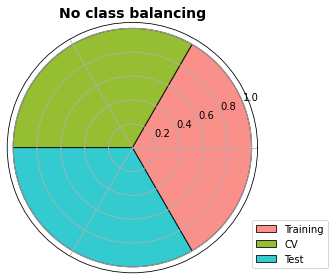

In [33]:
# No class balancing

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

data = df.iloc[0,:]

N = len(data)
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = data
width = 2 * np.pi / N

ax = plt.subplot(111, polar=True)

bars = ax.bar(theta, radii, width=width, bottom=0.0)
ax.xaxis.set_ticks(theta)

#ax.set_xticklabels(radii.index, fontsize=14)
ax.set_xticklabels(['','',''])
ax.tick_params(axis='x', which='major')

cmap = colors.ListedColormap(['#F8766D', '#7CAE00', '#00BFC4'])

for r, bar in zip(theta, bars):
    #bar.set_facecolor(plt.cm.hsv(r / np.pi / 2))
    bar.set_facecolor(cmap(r / np.pi / 2))
    bar.set_alpha(0.8)
    bar.set_edgecolor('black')

ax.legend(bars, radii.index, loc='lower right', bbox_to_anchor=(1.3, 0) )

ax.set_title('No class balancing', fontsize=14, fontweight='bold', pad=5) # Training set

plt.tight_layout()
plt.savefig('Figure_polarplot_MCC_df1.pdf')

In [34]:
theta

array([0.       , 2.0943951, 4.1887902])

In [35]:
radii

Training    1.0
CV          1.0
Test        1.0
Name: No class balancing, dtype: float64

In [36]:
# Custom function for making polar plot

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

def make_polar_plot(data, plotlabel):
  N = len(data)
  theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
  radii = data
  width = 2 * np.pi / N

  ax = plt.subplot(111, polar=True)

  bars = ax.bar(theta, radii, width=width, bottom=0.0)
  ax.xaxis.set_ticks(theta)

  #ax.set_xticklabels(radii.index, fontsize=14)
  ax.set_xticklabels(['','',''])
  ax.tick_params(axis='x', which='major')

  cmap = colors.ListedColormap(['#F8766D', '#7CAE00', '#00BFC4'])

  for r, bar in zip(theta, bars):
      #bar.set_facecolor(plt.cm.hsv(r / np.pi / 2))
      bar.set_facecolor(cmap(r / np.pi / 2))
      bar.set_alpha(0.7)
      bar.set_edgecolor('black')

  #ax.legend(bars, radii.index, loc='lower right', bbox_to_anchor=(1.3, 0) )

  ax.set_title(plotlabel, fontsize=14, fontweight='bold', pad=5) # Training set

  txt = plotlabel.split()
  txt2 = [x.capitalize() for x in txt]
  txt3 = ''.join(txt2)

  plt.tight_layout()
  plt.savefig(f'Figure_polarplot_MCC_{txt3}.pdf')

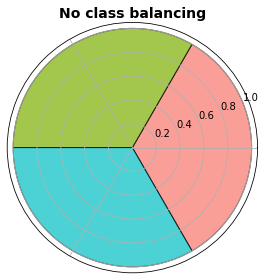

In [37]:
# No class balancing
data = df.iloc[0,:]

make_polar_plot(data, 'No class balancing')


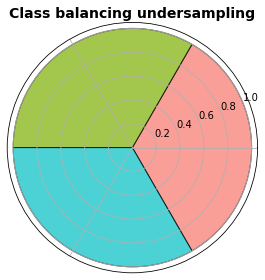

In [38]:
# Class balancing (undersampling)
data = df.iloc[1,:]

make_polar_plot(data, 'Class balancing undersampling')

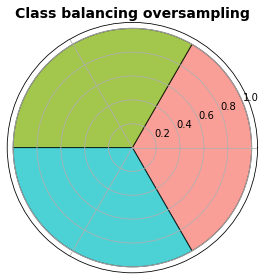

In [39]:
# Class balancing (oversampling)
data = df.iloc[2,:]

make_polar_plot(data, 'Class balancing oversampling')

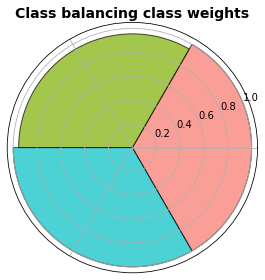

In [40]:
# Class balancing (class weights)
data = df.iloc[3,:]

make_polar_plot(data, 'Class balancing class weights')

In [41]:
! zip Figure_PolarPlot.zip *.pdf

'zip' is not recognized as an internal or external command,
operable program or batch file.
